
# ME 2061: Reduced Order Modeling

## Homework 3

*Author: Jacob Cunningham*

*Source code: [GitHub Repo](https://github.com/GoogleTookMyLunch/ME_2061/tree/main/homework)*

## Table of Contents

<span style="font-size: 1.25em">1. [Problem 1](#Problem-1)</span>

<span style="font-size: 1.25em">2. [Problem 2](#Problem-2)</span>

<span style="font-size: 1.25em">3. [Problem 3](#Problem-3)</span>

### Notes

- **All mathematical calculations are performed by hand.** They are simply displayed using Markdown and $\mathrm{\LaTeX{}}$.  Python code, when used, is only used to check hand-calculations or when instructed to do so by the problem prompt.

- Vectors are written in bold lower-case letters ($\mathbf{v}$), matrices are written in bold upper-case letters ($\mathbf{A}$), and scalers are written as italicized lower-case letters ($c$).
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
<b>Final answers are formatted like this.</b>
</div>

In [142]:
%%javascript 
// JavaScript magic command so I can reference equations across MD cells
// Reference: https://stackoverflow.com/questions/41241984/equation-numbering-in-jupyter-notebooks
// Run this cell as necessary to format equation numbering
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>


### Problem 1

Let $\mathbf{f} = \big[ f_{1}, f_{2}, \ldots, f_n \big]^{T}$ be a vector of size $n \times 1$, and let $\mathbf{U} = \big[ \mathbf{u}_{1}, \mathbf{u}_{2}, \ldots, \mathbf{u}_r \big]{T} \in \mathbb{R}^{n \times r}$ where $r \lt n$ and the columns of matrix $\mathbf{U}$ are independent vectors. Let $\mathbf{p} = \big[ p_{1}, p_{2}, \ldots, p_{r'} \big]^{T}$ be the vector containing indices, where $f \leq r' \leq n$. Using MATLAB indexing, $\mathbf{f}(\mathbf{p}) = \big[ f_{p_1}, f_{p_2}, \ldots, f_{p_{r'}} \big]^{T}$ selects a subset of elements from the vector $\mathbf{f}$ corresponding to the indices in $\mathbf{p}$.  Let $\mathbf{P} = \mathbf{I}(:, \mathbf{p}) \in \mathbb{R}^{n \times r'}$ denote the *indexing matrix* where $\mathbf{I}$ is the identity matrix of size $n \times n$. The matrix $\mathbf{I}(:, \mathbf{p})$ selects $r'$ columns of the identity matrix with index $\mathbf{p}$.  It is easy to verify that $\mathbf{P}^{T} \mathbf{f} \equiv \mathbf{f}(\mathbf{p})$ and $\mathbf{P}^{T} \mathbf{U} \equiv \mathbf{U}(\mathbf{p}, :)$. In Lecture 3, we formulated projection ($\mathcal{P}_p$), regression ($\mathcal{P}_r$), interpolation ($\mathcal{P}_i$) matrices as in the following:

$$
\begin{equation*}
  \mathcal{P}_p = \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T}
  \label{eq:projection}
  \tag{1}
\end{equation*}
$$

$$
\begin{equation*}
  \mathcal{P}_r = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T}
  \label{eq:regression}
  \tag{2}
\end{equation*}
$$

$$
\begin{equation*}
  \mathcal{P}_i = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{P}^{T}
  \label{eq:interpolation}
  \tag{3}
\end{equation*}
$$

where $( \; )^{\dagger}$ denotes the Moore-Penrose pseudoinverse of a matrix, i.e., $\mathbf{A}^{\dagger} = \big( \mathbf{A}^{T} \mathbf{A} \big)^{-1} \mathbf{A}^{T}$.


#### Problem 1 calculations



1\. Show that if $\mathbf{U}$ is an orthonormal matrix, $\mathcal{P}_{p} = \mathbf{U} \mathbf{U}^{T}$.

From Equation $(\ref{eq:projection})$:

$$
\begin{equation*}
  \mathcal{P}_p = \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T}
\end{equation*}
$$

And from [Lecture 2](../lectures/lecture_pdfs/lecture_2.pdf), for orthonormal vectors:

$$
\langle \mathbf{u}_{i}, \mathbf{u}_{j} \rangle = \mathbf{u}_{i}^{T} \mathbf{u}_{j} = \delta_{ij} 
\begin{cases}
  1 & i = j \\
  0 & i \neq j
\end{cases}
$$
<br>
$$
\begin{equation*}
  \mathbf{U}^{T} \mathbf{U} = 
  \begin{bmatrix}
    \mathbf{u}_{1}^{T} \\
    \mathbf{u}_{2}^{T} \\
    \vdots \\
    \mathbf{u}_{r}^{T}
  \end{bmatrix}
  \begin{bmatrix}
    \mathbf{u}_{1} & \mathbf{u}_{2} & \ldots & \mathbf{u}_{r} 
  \end{bmatrix} = 
  \begin{bmatrix}
    \mathbf{u}_{1}^{T} \mathbf{u}_{1} & \mathbf{u}_{1}^{T} \mathbf{u}_{2} & \ldots & \mathbf{u}_{1}^{T} \mathbf{u}_{r} \\
    \mathbf{u}_{2}^{T} \mathbf{u}_{1} & \mathbf{u}_{2}^{T} \mathbf{u}_{2} & \ldots & \mathbf{u}_{2}^{T} \mathbf{u}_{r} \\
    \vdots & \vdots & \ddots & \vdots \\
    \mathbf{u}_{r}^{T} \mathbf{u}_{1} & \mathbf{u}_{r}^{T} \mathbf{u}_{2} & \ldots & \mathbf{u}_{r}^{T} \mathbf{u}_{r}
  \end{bmatrix} =
  \mathbf{I}\rvert_{r \times r}
  \label{eq:kronecker}
  \tag{4}
\end{equation*}
$$

Substituting Equation $(\ref{eq:kronecker})$ into Equation $(\ref{eq:projection})$ yields:

$$
\begin{align*}
  \mathcal{P}_p & = \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \\
  & = \mathbf{U} \big( \mathbf{I} \big)^{-1} \mathbf{U}^{T} \\
  & = \mathbf{U} \mathbf{I} \mathbf{U}^{T} \\
  & = \mathbf{U} \mathbf{U}^{T}
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\therefore$ if the columns of $\mathbf{U}$ are orthonormal then $\mathcal{P}_{p} = \mathbf{U} \mathbf{U}^{T}$
</div>

2\. Show that when $r' = r, \mathcal{P}_{r} =\mathcal{P}_{i}$.

From Equations $(\ref{eq:interpolation})$ and $(\ref{eq:regression})$:

$$
\begin{align*}
  \mathcal{P}_i & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{P}^{T} \\ \\
  \mathcal{P}_r & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T}
\end{align*}
$$

Since $\mathbf{P}^{T} \mathbf{U}$ is full rank and square when $r' = r$, from the conditions of the Moore-Penrose pseudoinverse:

$$
\begin{align*}
  \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} & = \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1}
\end{align*}
$$

Explicitly,

$$
\begin{align*}
  \mathcal{P}_r & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} \\
  & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{P}^{T} \\
  & = \mathcal{P}_{i}
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\therefore$ if $r' = r, \mathcal{P}_{r} =\mathcal{P}_{i}$
</div>

3\. Show that when $r' = n, \mathcal{P}_{r} = \mathcal{P}_{p}$

From Equations $(\ref{eq:projection})$ and $(\ref{eq:regression})$:

$$
\begin{align*}
  \mathcal{P}_p = \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T}
\end{align*}
$$

$$
\begin{align*}
  \mathcal{P}_r = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T}
\end{align*}
$$

$\mathbf{P}$ is defined as:

$$
\begin{align*}
  \mathbf{P} = \mathbf{I} \big(:, \mathbf{p} \big)
\end{align*}
$$

where $\mathbf{p}$ is the integer index vector.  Since the integer index vector includes all the indices of 1 through and including $n$:

$$
\begin{align*}
  \mathcal{P}_r & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} \\
  & = \mathbf{U} \big( \mathbf{I}^{T} \mathbf{U} \big)^{\dagger} \mathbf{I}^{T} \\
  & = \mathbf{U} \big( \mathbf{I} \mathbf{U} \big)^{\dagger} \mathbf{I} \\
  & = \mathbf{U} \big( \mathbf{U} \big)^{\dagger}
\end{align*}
$$

From the definition of the Moore-Penrose pseudomatrix:

$$
\begin{align*}
  \mathcal{P}_r & = \mathbf{U} \big( \mathbf{U} \big)^{\dagger} \\
  & = \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \\
  & = \mathcal{P}_{p}
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\therefore$ if $r' = n, \mathcal{P}_{r} =\mathcal{P}_{p}$
</div>

4\. Show that $\mathcal{P}_{p}$ is a projector.

From [Lecture 2](../lectures/lecture_pdfs/lecture_2.pdf) the matrix $\mathbf{P}_{n\times n}$ is a projector if: 

$$
\begin{equation*}
  \mathbf{P}^{2} = \mathbf{P}
  \label{eq:projector}
  \tag{5}
\end{equation*}
$$

Substituting Equation $(\ref{eq:projection})$ into Equation $(\ref{eq:projector})$ yields:

$$
\begin{align*}
  \mathcal{P}_{p} & = \mathcal{P}_{p}^{2} \\
  & = \big( \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \big)
  \big( \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \big) \\
  & = \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T}
  \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \\
  & = \mathbf{U} \mathbf{I} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \\
  & = \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \\
  & = \mathcal{P}_{p}
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\therefore$ $\mathcal{P}_{p}$ is a projector
</div>

5\. Show that $\mathcal{P}_{r}$ is a projector.

Substituting Equation $(\ref{eq:regression})$ into $(\ref{eq:projector})$ yields:

$$
\begin{align*}
  \mathcal{P}_{r} & = \mathcal{P}_{r}^{2} \\
  & = \big( \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} \big)
  \big( \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} \big) \\
  & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} 
  \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T}
\end{align*}
$$

Since $\mathbf{A}^{\dagger} \mathbf{A} \mathbf{A}^{\dagger} = \mathbf{A}^{\dagger}$, and letting $\mathbf{A} = \mathbf{P}^{T} \mathbf{U}$ yields:

$$
\begin{align*}
  \mathcal{P}_{r}^{2} & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} 
  \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} \\
  & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} 
  \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \big( \mathbf{P}^{T} \mathbf{U} \big) \big( \mathbf{P}^{T} \mathbf{U}
  \big)^{\dagger} \mathbf{P}^{T} \\
  & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \; \mathbf{I} \; \mathbf{I} \; \mathbf{P}^{T} \\
  & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{I} \mathbf{P}^{T} \\
  & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} \\
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
    $\therefore$ $\mathcal{P}_{r}$ is a projector.
</div>

6\. Show that $\mathcal{P}_{i}$ is a projector.

Substituting Equation $(\ref{eq:interpolation})$ into Equation $(\ref{eq:projector})$ yields:

$$
\begin{align*}
  \mathcal{P}_{i}^{2} & = \big( \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{P}^{T} \big)
  \big( \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{P}^{T} \big) \\
  & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{P}^{T} \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1}
  \mathbf{P}^{T} \\
  & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{I} \mathbf{P}^{T} \\
  & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{P}^{T} \\
  & = \mathcal{P}_{i}
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
    $\therefore$ $\mathcal{P}_{i}$ is a projector.
</div>

7\. Show that $\mathcal{P}_{p}$ is an orthogonal projector.

From [Lecture 2](../lectures/lecture_pdfs/lecture_2.pdf) the matrix $\mathbf{P}_{n\times n}$ is an orthogonal projector if $\mathbf{P}^{2} = \mathbf{P}$ and $\mathbf{P}^{T} = \mathbf{P}$.

And Equation $(\ref{eq:projection})$ reduces to:

$$
\begin{align*}
  \mathcal{P}_{p} & = \mathcal{P}_{p}^{T} \\
  & = \big( \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \big)^{T} \\
  & =  \big( \mathbf{U}^{T} \big)^{T} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-T} \mathbf{U}^{T} \\
  & =  \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-T} \mathbf{U}^{T} \\
  & =  \mathbf{U} \big( \big( \mathbf{U}^{T} \mathbf{U} \big)^{T} \big)^{-1} \mathbf{U}^{T} \\
  & =  \mathbf{U} \big( \mathbf{U}^{T} \big( \mathbf{U}^{T} \big)^{T} \big)^{-1} \mathbf{U}^{T} \\
  & =  \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U}^{T} \big)^{-1} \mathbf{U}^{T} \\
  & = \mathcal{P}_{p}
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\therefore$ $\mathcal{P}_{p}$ is an orthogonal projector
</div>

8\. Show that $\mathcal{P}_{r}$ is an oblique projector when $r' \lt n$.

It was shown in 5\. that $\mathcal{P}_{r}$ is a projector.  If $\mathcal{P}^{T} = \mathcal{P}$ the projector is orthogonal; otherwise (i.e., $\mathcal{P}^{T} \neq \mathcal{P}$) the projector is oblique.

From Equation $(\ref{eq:regression})$:

$$
\begin{align*}
  \mathcal{P}_r^{T} & = \big( \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T} \big)^{T} \\
  & = \mathbf{P} \big( \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \big)^{T} \mathbf{U}^{T}
\end{align*}
$$

##### Case 1: &emsp; $r' = n$

It was proven in 3\. that when $r' = n, \mathcal{P}_{r} = \mathcal{P}_{p}$ and it was proven in 7\. that $\mathcal{P}_{p}$ is an orthogonal projector. So the equation should reduce to $\mathcal{P}_{r}^{T} = \mathcal{P}_{p}$ when $r' = n$.

$$
\begin{align*}
  \mathcal{P}_r^{T} & = \mathbf{P} \big( \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \big)^{T} \mathbf{U}^{T} \\
  & = \mathbf{I} \big( \big( \mathbf{I}^{T} \mathbf{U} \big)^{\dagger} \big)^{T} \mathbf{U}^{T} \\
  & = \mathbf{U} \big( \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1}  \big)^{T} \mathbf{U}^{T} \\
  & = \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \\
  & = \mathbf{P}_{p}
\end{align*}
$$

##### Case 2: &emsp; $r' < n$

Since $\mathbf{P}^{T} \mathbf{U}$ is not full rank and square the conditions of the Moore-Penrose pseudomatrix are not met I cannot reduce this further to show $\mathcal{P}_{r}^{T} = \mathcal{P}_{r}$ which implies $\mathcal{P}_{r}^{T} \neq \mathcal{P}_{r}$ when $r' \lt n$.
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\therefore$ $\mathcal{P}_{r}$ is an oblique projector when $r' \lt n$.
</div>

9\. Show that $\mathcal{P}_{i}$ is an oblique projector.

It was shown in 6\. that $\mathcal{P}_{i}$ is a projector.  If $\mathcal{P}^{T} = \mathcal{P}$ the projector is orthogonal; otherwise (i.e., $\mathcal{P}^{T} \neq \mathcal{P}$) the projector is oblique.

From Equation $(\ref{eq:interpolation})$:

$$
\begin{align*}
  \mathcal{P}_{i}^{T} & = \big( \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{P}^{T} \big)^{T} \\
  & = \mathbf{P} \big( \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \big)^{T} \mathbf{U}^{T} \\
  & = \mathbf{P} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T} \\
  & \neq \mathcal{P}_{i}
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\therefore$ $\mathcal{P}_{i}$ is an oblique projector.
</div>


### Problem 2

Adopt the notation introduced in [Problem 1](#Problem-1) for this problem as well.  Consider the vectors $\mathbf{f}$ and $\mathbf{U}$ given by:

$$
\mathbf{f} = 
\begin{pmatrix}
  1 \\
  0 \\
  -2
\end{pmatrix}
\qquad
\mathbf{U} = 
\begin{bmatrix}
  \frac{1}{\sqrt{2}}
  \begin{pmatrix}
    1 \\
    -1 \\
    0
  \end{pmatrix}
  \text{, }
  \frac{1}{\sqrt{3}}
  \begin{pmatrix}
    1 \\
    1 \\
    1
  \end{pmatrix}
\end{bmatrix}
\qquad
$$

Therefore, in this problem, the *ambient* dimension is $n = 3$ and the dimension of the subspace is $r = 2$.

Consider $\mathbf{p} = \big[ 1, 3 \big]$.


#### Problem 2 calculations


1\. Compute the interpolatory projector $\mathcal{P}_{i}$ and compute $\mathbf{\hat{f}} = \mathcal{P}_{i} \mathbf{f}$.

$$
\mathbf{P} \equiv \mathbf{I}(:, \mathbf{p}) = \mathbf{I} \big(: \;, \; [ 1, 3 ]\big) = 
\begin{bmatrix}
  1 & 0 & 0\\
  0 & 1 & 0\\
  0 & 0 & 1
\end{bmatrix}
$$

From Equation $(\ref{eq:interpolation})$:

$$
\begin{align*}
  \mathcal{P}_i & = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{-1} \mathbf{P}^{T} \\ \\
  & = 
  \begin{bmatrix}
    1/\sqrt{2} & 1/\sqrt{3} \\
    -1/\sqrt{2} & 1/\sqrt{3} \\
    0 & 1/\sqrt{3}
  \end{bmatrix}
  \Bigg(
  \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 0 & 1
  \end{bmatrix}
  \begin{bmatrix}
    1/\sqrt{2} & 1/\sqrt{3} \\
    -1/\sqrt{2} & 1/\sqrt{3} \\
    0 & 1/\sqrt{3}
  \end{bmatrix}
  \Bigg)^{-1}
  \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 0 & 1
  \end{bmatrix}
\end{align*}
$$

In [69]:
# Python to do the computation
# Import necessary moduels and libraries
import numpy as np

# Define the matrices
matrix1 = np.array([[1/np.sqrt(2), 1/np.sqrt(3)], [-1/np.sqrt(2), 1/np.sqrt(3)], [0, 1/np.sqrt(3)]])
matrix2 = np.array([[1, 0, 0], [0, 0, 1]])

# Calculate the result
result = np.dot(matrix1, np.dot(np.linalg.inv(np.dot(matrix1.T, matrix1)), matrix1.T))

print(result)

[[ 0.83333333 -0.16666667  0.33333333]
 [-0.16666667  0.83333333  0.33333333]
 [ 0.33333333  0.33333333  0.33333333]]


$$
\mathcal{P}_{i} = 
\begin{bmatrix}
  5/6 & -1/6 & 1/3 \\
  -1/6 & 5/6 & 1/3 \\
  1/3 & 1/3 & 1/3
\end{bmatrix}
$$

$$
\begin{align*}
  \mathbf{\hat{f}} & = \mathcal{P}_{i} \mathbf{f} \\ \\
  & = 
  \begin{bmatrix}
    5/6 & -1/6 & 1/3 \\
    -1/6 & 5/6 & 1/3 \\
    1/3 & 1/3 & 1/3
  \end{bmatrix}
  \begin{bmatrix}
    1 \\
    0 \\
    -2
  \end{bmatrix}
\end{align*}
$$

In [70]:
# Python to do the computation
# Import necessary moduels and libraries
import numpy as np

# Define the matrix
matrix = np.array([[5/6, -1/6, 1/3], [-1/6, 5/6, 1/3], [1/3, 1/3, 1/3]])

# Define the vector
vector = np.array([1, 0, -2])

# Calculate the result
result = np.dot(matrix, vector)

print(result)

[ 0.16666667 -0.83333333 -0.33333333]


$$
\mathbf{\hat{f}} =
\begin{bmatrix}
  1/6 \\
  -5/6 \\
  -1/3
\end{bmatrix}
$$


<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$$
\mathcal{P}_{i} = 
\begin{bmatrix}
  5/6 & -1/6 & 1/3 \\
  -1/6 & 5/6 & 1/3 \\
  1/3 & 1/3 & 1/3
\end{bmatrix}
\qquad
\text{ and }
\qquad
\mathbf{\hat{f}} =
\begin{bmatrix}
  1/6 \\
  -5/6 \\
  -1/3
\end{bmatrix}
$$
</div>

2\. Confirm that $\mathbf{\hat{f}}(\mathbf{p}) = \mathbf{f}(\mathbf{p})$

$\mathbf{f}$ and $\mathbf{\hat{f}}$ are linearly dependent since $\alpha \mathbf{f} = \mathbf{\hat{f}}$ when $\alpha = 1/6$

<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$$
\begin{align*}
  \mathbf{\hat{f}}(\mathbf{p}) & =
  \begin{bmatrix}
    1/6 \\
    -1/3
  \end{bmatrix} =
  \alpha \begin{bmatrix}
    1 \\
    -2 
  \end{bmatrix} = 6 
  \begin{bmatrix}
    1/6 \\
    -1/3 
  \end{bmatrix} = 
  \begin{bmatrix}
    1 \\
    -2
  \end{bmatrix} =
  \mathbf{f}(\mathbf{p})
\end{align*}
$$
</div>

3\. Compute the error of the interpolatory projector $\mathbf{e} = \mathbf{f} - \mathbf{\hat{f}}$.

$$
\begin{align*}
  \mathbf{e} & = \mathbf{f} - \mathbf{\hat{f}} \\ \\
  & =
  \begin{bmatrix}
    1 \\
    0 \\
    -2
  \end{bmatrix} -
  \begin{bmatrix}
  1/6 \\
  -5/6 \\
  -1/3
  \end{bmatrix} \\ \\
  & = 
  \begin{bmatrix}
    5/6 \\
    5/6 \\
    -5/3
  \end{bmatrix}
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$$
\mathbf{e} =
\begin{bmatrix}
  5/6 \\
  5/6 \\
  -5/3
\end{bmatrix}
$$
</div>

4\. Confirm that $\mathcal{P}_{i}$ is an oblique projector by showing that $\mathbf{e}$ and $\mathbf{\hat{f}}$ are not orthogonal to each other. Compute the angle between $\mathbf{\hat{f}}$ and $\mathbf{e}$.

$$
\begin{align*}
  \langle \mathbf{e}, \mathbf{\hat{f}} \rangle & = \mathbf{e}^{T} \mathbf{\hat{f}} \\
 & =  \begin{bmatrix}
    5/6 & 5/6 & -5/3
  \end{bmatrix}
  \begin{bmatrix}
    1/6 \\
    -5/6 \\
    -1/3
  \end{bmatrix} \\
  & = 25/6
\end{align*}

The angle between two vectors is defined as:

$$
\begin{align*}
  \cos{\theta} = \frac{\mathbf{e}^{T} \mathbf{\hat{f}}}{\lVert \mathbf{e} \rVert \lVert \mathbf{\hat{f}} \rVert}
\end{align*}
$$

In [71]:
# Python to do the computation
# Import necessary moduels and libraries
import numpy as np

# Define the two vectors
evec = np.array([5/6, 5/6, -5/3])
fvec = np.array([1, 0, -2])

# Calculate the dot product of the two vectors
dot_product = np.dot(evec, fvec)

# Calculate the magnitude (norm) of each vector
magnitude1 = np.linalg.norm(evec)
magnitude2 = np.linalg.norm(fvec)

# Calculate the cosine of the angle
cosine_theta = dot_product / (magnitude1 * magnitude2)

# Calculate the angle in radians using the arccosine function
angle_rad = np.arccos(cosine_theta)

# Convert the angle from radians to degrees
result = np.degrees(angle_rad)

print(result)

24.09484255211071


The angle between the two vectors is $\approx 24 \; \text{deg}$

<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\langle \mathbf{e}, \mathbf{\hat{f}} \rangle = 25/6 \neq 0$  which means the vectors are oblique, and the angle between the two vectors is $\approx 24 \; \text{deg}$
</div>

5\. Compute the magnitude of the error $\lVert \mathbf{e} \rVert$ and compare the value of this error with that obtained from the orthogonal projection of $\mathbf{f}$ onto $\mathbf{U}$.  For the orthogonal projection, you can use your results from Homework 2, Problem 2, Part 6.

$$
\begin{align*}
  \rVert \mathbf{e} \lVert & = \sqrt{e_{1}^{2} + e_{2}^{2} + e_{3}^{2}} \\
  & = \sqrt{(5/6)^{2} + (5/6)^{2} + (-5/3)^{2}} \\
  & = \sqrt{25/36 + 25/36 +100/36} \\
  & = \frac{5}{\sqrt{3} \; \sqrt{2}}
\end{align*}
$$

From Homework 2, Problem 2, Part 6:

$$
\begin{align*}
\mathcal{P}_{p} \mathbf{x} & =
  \begin{bmatrix}
    1/6 \\
    -5/6 \\
    -1/3
  \end{bmatrix}
\end{align*}
$$

$$
\begin{align*}
  \lVert \mathcal{P}_{p} \mathbf{x} \rVert & =
  \sqrt{ (1/6)^{2} + (-5/6)^{2} + (-1/3)^{2}} \\
  & = \sqrt{ 1/36 + 25/36 + 4/36} \\
  & = \sqrt{30/36} \\
  & = \frac{\sqrt{5}}{\sqrt{3} \; \sqrt{2}}
\end{align*}
$$
<br>
<div style="border:solid; margin: auto; text-align: center; padding: 1em">
The value of this error is $\frac{5 - \sqrt{5}}{\sqrt{3} \; \sqrt{2}}$
</div>


### Problem 3

Consider $\mathbf{x} \in \mathbb{R}^{n \times 1}$ be an equidistant discretization of $x \in \big[ -1, 1 \big]$.  This can achieved in MATLAB with $\mathbf{x} = $ `linspace(-1, 1, n)'`.  Take $n = 100$. Consider how the vector $\mathbf{f}$ and the matrix $\mathbf{U}$ as in the following:

$$
\mathbf{f} = \exp \big( -2x^{2} \big)
\qquad
\text{ and }
\qquad
\mathbf{U} =
\begin{bmatrix}
  \mathbf{1} & x & x^{2} & x^{3} & x^{4}
\end{bmatrix}
$$

where $\mathbf{1} = \big[ 1, 1, \ldots, 1 \big]^{T} \in \mathbb{R}^{ n \times 1}$, and $\mathbf{U} \in \mathbb{R}^{n \times 5}$.  Therefore, in this problem, the *ambient* dimension is $n=100$ and the dimension of the subspace is $r=5$.


#### Problem 3 calculations


1\. Compute the orthogonal projection of $\mathbf{f}$ onto $\mathbf{U}$ and denote the projected vector with $\mathbf{\hat{f}_{o}}$.  Compute the error $\mathbf{e_{o}} = \mathbf{f} - \mathbf{\hat{f}_{o}}$ and show that the error is orthogonal to $\mathbf{\hat{f}_{o}}$.

$\mathcal{P}_{p} = \mathbf{U} \big( \mathbf{U}^{T} \mathbf{U} \big)^{-1} \mathbf{U}^{T}$

$\mathbf{\hat{f}_o} = \mathcal{P}_{p} \mathbf{f}$

In [76]:
# Python to do the computation
# Import necessary moduels and libraries
import numpy as np

# Define the value of n
n = 100

# Create the range [-1, 1]
x = np.linspace(-1, 1, n).reshape(-1, 1)  # Reshape to make it a column vector

# Create the vector f
f = np.exp(-2 * x**2)

# Create the matrix U
U = np.column_stack([np.ones((n, 1)), x, x**2, x**3, x**4])

# Calculate the projection matrix Pp
Pp = np.dot(U, np.dot(np.linalg.inv(np.dot(U.T, U)), U.T))

# Calculate the estimated f_hat_o
f_hat_o = np.dot(Pp, f)

# Calculate the error vector e_o
e_o = f - f_hat_o

# Calculate the euclidean inner product
inprod = np.dot(e_o.T, f_hat_o)


#### Orthogonal projection

Unhide this code block output to see the result.

In [77]:
print(f_hat_o)

[[0.16417797]
 [0.16419363]
 [0.16686242]
 [0.17202019]
 [0.17950624]
 [0.18916328]
 [0.20083744]
 [0.21437826]
 [0.2296387 ]
 [0.24647517]
 [0.26474745]
 [0.28431878]
 [0.3050558 ]
 [0.32682857]
 [0.34951058]
 [0.37297873]
 [0.39711334]
 [0.42179814]
 [0.44692031]
 [0.47237042]
 [0.49804247]
 [0.52383388]
 [0.54964548]
 [0.57538154]
 [0.60094973]
 [0.62626115]
 [0.65123031]
 [0.67577514]
 [0.69981701]
 [0.72328068]
 [0.74609435]
 [0.76818963]
 [0.78950155]
 [0.80996857]
 [0.82953255]
 [0.84813878]
 [0.86573597]
 [0.88227626]
 [0.89771518]
 [0.91201172]
 [0.92512824]
 [0.93703057]
 [0.94768792]
 [0.95707294]
 [0.9651617 ]
 [0.97193367]
 [0.97737177]
 [0.9814623 ]
 [0.98419503]
 [0.9855631 ]
 [0.9855631 ]
 [0.98419503]
 [0.9814623 ]
 [0.97737177]
 [0.97193367]
 [0.9651617 ]
 [0.95707294]
 [0.94768792]
 [0.93703057]
 [0.92512824]
 [0.91201172]
 [0.89771518]
 [0.88227626]
 [0.86573597]
 [0.84813878]
 [0.82953255]
 [0.80996857]
 [0.78950155]
 [0.76818963]
 [0.74609435]
 [0.72328068]
 [0.69


#### Error

Unhide this code block output to see the result.

In [78]:
print(e_o)

[[-2.88426871e-02]
 [-1.75878671e-02]
 [-8.30663354e-03]
 [-8.20039924e-04]
 [ 5.04510250e-03]
 [ 9.45595382e-03]
 [ 1.25733752e-02]
 [ 1.45516624e-02]
 [ 1.55382852e-02]
 [ 1.56736373e-02]
 [ 1.50907985e-02]
 [ 1.39153133e-02]
 [ 1.22649890e-02]
 [ 1.02497165e-02]
 [ 7.97131805e-03]
 [ 5.52342344e-03]
 [ 2.99137946e-03]
 [ 4.52194399e-04]
 [-2.02547928e-03]
 [-4.38132194e-03]
 [-6.56328140e-03]
 [-8.52746354e-03]
 [-1.02379777e-02]
 [-1.16667364e-02]
 [-1.27932085e-02]
 [-1.36041271e-02]
 [-1.40931519e-02]
 [-1.42604888e-02]
 [-1.41124674e-02]
 [-1.36610793e-02]
 [-1.29234815e-02]
 [-1.19214666e-02]
 [-1.06809053e-02]
 [-9.23116574e-03]
 [-7.60451363e-03]
 [-5.83550007e-03]
 [-3.96034161e-03]
 [-2.01629908e-03]
 [-4.10610701e-05]
 [ 1.92786161e-03]
 [ 3.85372439e-03]
 [ 5.70111407e-03]
 [ 7.43648466e-03]
 [ 9.02865816e-03]
 [ 1.04492849e-02]
 [ 1.16732582e-02]
 [ 1.26790789e-02]
 [ 1.34491658e-02]
 [ 1.39701082e-02]
 [ 1.42328577e-02]
 [ 1.42328577e-02]
 [ 1.39701082e-02]
 [ 1.3449165


#### Orthogonality


In [79]:
print(inprod)

[[2.71831169e-14]]


<div style="border:solid; margin: auto; text-align: center; padding: 1em">
Since the inner product is 0, $\mathbf{e}$ and $\mathbf{\hat{f}_{o}}$ are orthogonal.
</div>

2\. Consider the indices $\mathbf{p}_{i_{1}} = \big[ 1 \; 100 \; 17 \; 84 \; 50 \big]$.  Note that the order of these indices is not important.  Use these indices to build an interpolatory projector $\mathcal{P}_{i_{1}}$ and interpolate $\mathbf{f}$ onto $\mathbf{U}$ using $\mathcal{P}_{i_{1}}$.  Denote the interpolated function with $\mathbf{\hat{f}}_{i_{1}}$. Show that $\mathbf{f} ( \mathbf{p}_{1} ) = \mathbf{\hat{f}}_{i_{1}} ( \mathbf{p}_{1} )$.  Compute the projection error $\mathbf{e}_{i_{1}} = \mathbf{f} - \mathbf{\hat{f}}_{i_{1}}$.  What is the angle between $\mathbf{e}_{i_{1}}$ and $\mathbf{\hat{f}}_{i_{1}}$?  Denote the angle (in degree) with $\alpha_{1}$.

$\mathcal{P}_{i_{1}} = \mathbf{U} \big( \mathbf{P}_{i_{1}}^{T} \mathbf{U} \big)^{-1} \mathbf{P}_{i_{1}}^{T}$

$\mathbf{\hat{f}}_{i_{1}} = \mathcal{P}_{i_{1}} \mathbf{f}$

In [116]:
# Python to do the computation
# Import necessary moduels and libraries
import numpy as np

# Define the value of n
n = 100

# Create the range [-1, 1]
x = np.linspace(-1, 1, n).reshape(-1, 1)  # Reshape to make it a column vector

# Create the vector f
f = np.exp(-2 * x**2)

# Create the matrix U
U = np.column_stack([np.ones((n, 1)), x, x**2, x**3, x**4])

# Define the integer index vector p_i1
p_i1 = np.array([1, 100, 17, 84, 50])

# Define the size of the matrix
matrix_size = (100, 5)  # Correct size for P_i1

# Create an empty matrix filled with zeros
P_i1 = np.zeros(matrix_size)

# Set the elements at the specified indices to 1
P_i1[p_i1 - 1, np.arange(5)] = 1  # Subtract 1 to account for 0-based indexing

# Calculate the projection matrix scriptP_i1
scriptP_i1 = np.dot(np.dot(U, np.linalg.inv(np.dot(P_i1.T, U))), P_i1.T)

# Calculate f_hat_i1
f_hat_i1 = np.dot(scriptP_i1, f)

#### Show that $\mathbf{f} ( \mathbf{p_{1}}) = \mathbf{\hat{f}} ( \mathbf{p_{1}})$

In [125]:
# p_i1 rows
rows_to_extract = p_i1 - 1  # Subtract 1 to account for 0-based indexing

# Extract the specified rows
selected_rows = f_hat_i1[rows_to_extract].flatten()
selected_rows_f = f[rows_to_extract].flatten()

# Print the selected rows
print("Selected rows from f:", selected_rows_f)
print("Selected rows from f_hat_i1:", selected_rows)

Selected rows from f: [0.13533528 0.13533528 0.40010472 0.40010472 0.99979596]
Selected rows from f_hat_i1: [0.13533528 0.13533528 0.40010472 0.40010472 0.99979596]


#### Compute the projection error

Unhide the code block output below to see the output.

In [118]:
e_i1 = f - f_hat_i1
print(e_i1)

[[ 0.00000000e+00]
 [ 8.21916653e-03]
 [ 1.46327589e-02]
 [ 1.94131632e-02]
 [ 2.27271445e-02]
 [ 2.47355757e-02]
 [ 2.55931677e-02]
 [ 2.54482024e-02]
 [ 2.44422727e-02]
 [ 2.27100317e-02]
 [ 2.03789557e-02]
 [ 1.75691221e-02]
 [ 1.43930078e-02]
 [ 1.09553102e-02]
 [ 7.35279445e-03]
 [ 3.67417000e-03]
 [ 1.11022302e-16]
 [-3.59735420e-03]
 [-7.05375044e-03]
 [-1.03132427e-02]
 [-1.33280157e-02]
 [-1.60582757e-02]
 [-1.84720956e-02]
 [-2.05452147e-02]
 [-2.22607921e-02]
 [-2.36091146e-02]
 [-2.45872588e-02]
 [-2.51987108e-02]
 [-2.54529436e-02]
 [-2.53649558e-02]
 [-2.49547745e-02]
 [-2.42469258e-02]
 [-2.32698774e-02]
 [-2.20554574e-02]
 [-2.06382551e-02]
 [-1.90550084e-02]
 [-1.73439840e-02]
 [-1.55443561e-02]
 [-1.36955901e-02]
 [-1.18368370e-02]
 [-1.00063447e-02]
 [-8.24089321e-03]
 [-6.57525860e-03]
 [-5.04171225e-03]
 [-3.66956059e-03]
 [-2.48473035e-03]
 [-1.50940401e-03]
 [-7.61709499e-04]
 [-2.55467607e-04]
 [ 3.33066907e-16]
 [ 2.22044605e-16]
 [-2.55467607e-04]
 [-7.6170949

In [119]:
# Calculate the euclidean inner product
inprod = np.dot(e_i1.T, f_hat_i1)

# Convert the inner product to an angle in degrees
inprod_deg = np.degrees(np.arccos(inprod))

print(inprod_deg.flatten())

[125.04880471]


<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\alpha_{1} \approx 125 \text{ degrees}$
</div>

3\. Repeat all items of Part 2 with the indices $\mathbf{p}_{i_{2}} = \big[ 10 \; 20 \; 30 \; 40 \; 90 \big]$. Denote the interpolated function, the projection error, and the angle with $\mathbf{\hat{f}}_{i_{2}}, \mathbf{e}_{i_{2}}, \text{ and } \alpha_{2}$, respectively.

In [121]:
# Python to do the computation
# Import necessary moduels and libraries
import numpy as np

# Define the value of n
n = 100

# Create the range [-1, 1]
x = np.linspace(-1, 1, n).reshape(-1, 1)  # Reshape to make it a column vector

# Create the vector f
f = np.exp(-2 * x**2)

# Create the matrix U
U = np.column_stack([np.ones((n, 1)), x, x**2, x**3, x**4])

# Define the integer index vector p_i2
p_i2 = np.array([10, 20, 30, 40, 90])

# Define the size of the matrix
matrix_size = (100, 5)  # Correct size for P_i2

# Create an empty matrix filled with zeros
P_i2 = np.zeros(matrix_size)

# Set the elements at the specified indices to 1
P_i2[p_i2 - 1, np.arange(5)] = 1  # Subtract 1 to account for 0-based indexing

# Calculate the projection matrix scriptP_i2
scriptP_i2 = np.dot(np.dot(U, np.linalg.inv(np.dot(P_i2.T, U))), P_i2.T)

# Calculate f_hat_i2
f_hat_i2 = np.dot(scriptP_i2, f)

#### Show that $\mathbf{f} ( \mathbf{p_{2}}) = \mathbf{\hat{f}} ( \mathbf{p_{2}})$

In [124]:
# p_i2 rows
rows_to_extract = p_i2 - 1  # Subtract 1 to account for 0-based indexing

# Extract the specified rows
selected_rows = f_hat_i2[rows_to_extract].flatten()
selected_rows_f = f[rows_to_extract].flatten()

# Print the selected rows
print("Selected rows from f:", selected_rows_f)
print("Selected rows from f_hat_i2:", selected_rows)

Selected rows from f: [0.26214881 0.4679891  0.7096196  0.91393958 0.27983825]
Selected rows from f_hat_i2: [0.26214881 0.4679891  0.7096196  0.91393958 0.27983825]


#### Compute the projection error

Unhide the code block output below to see the output.

In [126]:
e_i2 = f - f_hat_i2
print(e_i2)

[[-4.94116979e-02]
 [-3.91012960e-02]
 [-3.02943327e-02]
 [-2.28558826e-02]
 [-1.66554483e-02]
 [-1.15672304e-02]
 [-7.47039866e-03]
 [-4.24935821e-03]
 [-1.79400971e-03]
 [-8.32667268e-16]
 [ 1.23104036e-03]
 [ 1.99127558e-03]
 [ 2.36646280e-03]
 [ 2.43577307e-03]
 [ 2.27163861e-03]
 [ 1.93962950e-03]
 [ 1.49836286e-03]
 [ 9.99447481e-04]
 [ 4.87466411e-04]
 [-6.10622664e-16]
 [-4.32308727e-04]
 [-7.85644688e-04]
 [-1.04286619e-03]
 [-1.19330445e-03]
 [-1.23251708e-03]
 [-1.16199565e-03]
 [-9.88828460e-04]
 [-7.25319644e-04]
 [-3.88566871e-04]
 [-2.88657986e-15]
 [ 4.15116111e-04]
 [ 8.28211026e-04]
 [ 1.20796624e-03]
 [ 1.52089616e-03]
 [ 1.73194754e-03]
 [ 1.80511195e-03]
 [ 1.70404560e-03]
 [ 1.39269057e-03]
 [ 8.35891252e-04]
 [-3.66373598e-15]
 [-1.14653450e-03]
 [-2.63260209e-03]
 [-4.48389525e-03]
 [-6.72240835e-03]
 [-9.36597735e-03]
 [-1.24278651e-02]
 [-1.59163966e-02]
 [-1.98346491e-02]
 [-2.41801992e-02]
 [-2.89449307e-02]
 [-3.41149058e-02]
 [-3.96703000e-02]
 [-4.5585402

In [131]:
# Calculate the euclidean inner product
inprod = np.dot(e_i2.T, f_hat_i2)

# Convert the inner product to an angle in degrees
inprod_deg2 = np.degrees(np.arccos(inprod / (np.linalg.norm(e_i2) * np.linalg.norm(f_hat_i2))))


print(inprod_deg2.flatten())

[125.77337421]


<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\alpha_{1} \approx 125 \text{ degrees}$
</div>

4\. Consider the indices $\mathbf{p}_{r} = \big[1 \; 100 \; 17 \; 84 \; 50 \; 58\big]$.  Note that $\mathbf{p}_{r}$ contains all $\mathbf{p}_{i_{1}}$ indices as well as an extra index of 58.  use these indices to build a regression projector $\mathcal{P}_{r}$ and regress $\mathbf{f}$ onto $\mathbf{U}$ using $\mathcal{P}_{r}$.  Denote the regressed function with $\mathbf{\hat{f}}_{r}$. Compute the projection error $\mathbf{e}_{r} = \mathbf{f} - \mathbf{\hat{f}}_{r}$. What is the angle between $\mathbf{e}_r$ and $\mathbf{\hat{f}}_{r}$?  Denote the angle (in degree) with $\alpha_{r}$.

$ \mathcal{P}_r = \mathbf{U} \big( \mathbf{P}^{T} \mathbf{U} \big)^{\dagger} \mathbf{P}^{T}$

$\mathbf{\hat{f}}_{r} = \mathcal{P}_{r} \mathbf{f}$

In [136]:
# Python to do the computation
# Import necessary moduels and libraries
import numpy as np

# Define the value of n
n = 100

# Create the range [-1, 1]
x = np.linspace(-1, 1, n).reshape(-1, 1)  # Reshape to make it a column vector

# Create the vector f
f = np.exp(-2 * x**2)

# Create the matrix U
U = np.column_stack([np.ones((n, 1)), x, x**2, x**3, x**4])

# Define the integer index vector p_r
p_r = np.array([1, 100, 17, 84, 50, 58])

# Define the size of the matrix
matrix_size = (100, 6)  # Correct size for P_r

# Create an empty matrix filled with zeros
P_r = np.zeros(matrix_size)

# Set the elements at the specified indices to 1
P_r[p_r - 1, np.arange(6)] = 1  # Subtract 1 to account for 0-based indexing

# Calculate the projection matrix scriptP_r
scriptP_r = np.dot(U, np.dot(np.linalg.pinv(np.dot(P_r.T, U)), P_r.T))

# Calculate f_hat_r
f_hat_r = np.dot(scriptP_r, f)

#### Compute the projection error

Unhide the code block output below to see the output.

In [138]:
e_r = f - f_hat_r
print(e_r)

[[ 0.0001859 ]
 [ 0.00819799]
 [ 0.01443153]
 [ 0.01905761]
 [ 0.02224172]
 [ 0.02414348]
 [ 0.02491637]
 [ 0.02470749]
 [ 0.02365724]
 [ 0.02189912]
 [ 0.01955949]
 [ 0.01675733]
 [ 0.01360402]
 [ 0.01020322]
 [ 0.00665066]
 [ 0.00303405]
 [-0.00056703]
 [-0.00408117]
 [-0.00744515]
 [-0.01060395]
 [-0.01351061]
 [-0.01612621]
 [-0.01841965]
 [-0.02036747]
 [-0.02195362]
 [-0.02316914]
 [-0.02401183]
 [-0.0244859 ]
 [-0.02460149]
 [-0.02437427]
 [-0.02382489]
 [-0.0229785 ]
 [-0.02186414]
 [-0.02051421]
 [-0.01896382]
 [-0.01725022]
 [-0.01541218]
 [-0.01348932]
 [-0.01152155]
 [-0.00954842]
 [-0.00760858]
 [-0.00573917]
 [-0.0039753 ]
 [-0.00234956]
 [-0.00089155]
 [ 0.00037256]
 [ 0.00142032]
 [ 0.00223341]
 [ 0.00279781]
 [ 0.00310403]
 [ 0.00314724]
 [ 0.00292731]
 [ 0.00244886]
 [ 0.00172114]
 [ 0.00075792]
 [-0.00042268]
 [-0.00179848]
 [-0.00334352]
 [-0.00502843]
 [-0.00682086]
 [-0.00868594]
 [-0.01058675]
 [-0.01248489]
 [-0.01434103]
 [-0.0161155 ]
 [-0.0177689 ]
 [-0.01926

In [139]:
# Calculate the euclidean inner product
inprod = np.dot(e_r.T, f_hat_r)

# Convert the inner product to an angle in degrees
inprod_deg3 = np.degrees(np.arccos(inprod / (np.linalg.norm(e_r) * np.linalg.norm(f_hat_r))))


print(inprod_deg3.flatten())

[115.50795909]


<div style="border:solid; margin: auto; text-align: center; padding: 1em">
$\alpha_{r} \approx 115 \text{ degrees}$
</div>

5\. Plot $\mathbf{f}$ and $\mathbf{\hat{f}}_{o}, \mathbf{\hat{f}}_{i_{1}}, \mathbf{\hat{f}}_{i_{2}}, \text{ and } \mathbf{\hat{f}}_{r}$ vs. x

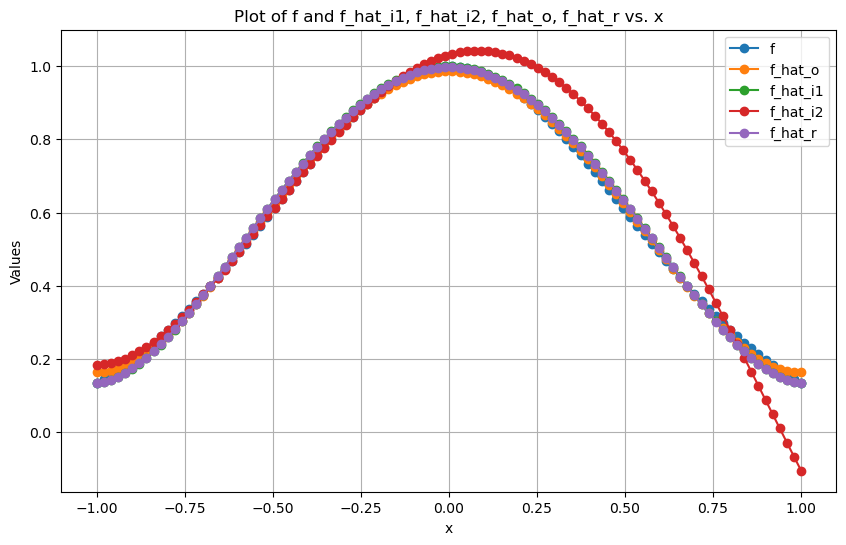

In [140]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.linspace(-1, 1, n).reshape(-1, 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, f, label='f', linestyle='-', marker='o')
plt.plot(x, f_hat_o, label='f_hat_o', linestyle='-', marker='o')
plt.plot(x, f_hat_i1, label='f_hat_i1', linestyle='-', marker='o')
plt.plot(x, f_hat_i2, label='f_hat_i2', linestyle='-', marker='o')
plt.plot(x, f_hat_r, label='f_hat_r', linestyle='-', marker='o')

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('Values')
plt.title('Plot of f and f_hat_i1, f_hat_i2, f_hat_o, f_hat_r vs. x')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


6\. Plot the norm of the error of each of the above four parts versus the angle.  To this end, first sort the angle from smallest to largest.  What conclusion can youd raw from this figure?

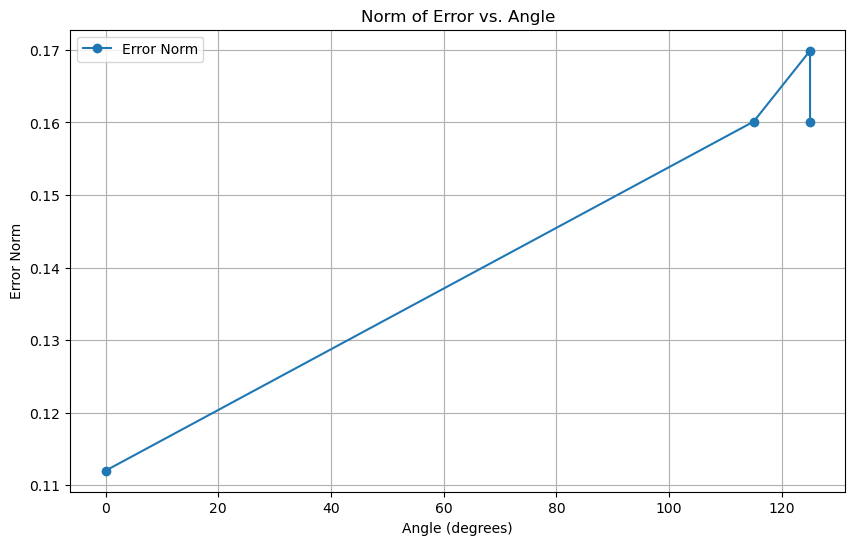

In [141]:
import numpy as np
import matplotlib.pyplot as plt


# angles
angles = [0, 125, 125, 115]

# error_norms
norm_e_o = np.linalg.norm(e_o)
norm_e_i1 = np.linalg.norm(e_i1)
norm_e_i2 = np.linalg.norm(e_i2)
norm_e_r = np.linalg.norm(e_r)

error_norms = [norm_e_o, norm_e_i1, norm_e_i2, norm_e_r]

# Sort the angles and error norms together
sorted_data = sorted(zip(angles, error_norms), key=lambda x: x[0])
sorted_angles, sorted_error_norms = zip(*sorted_data)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_angles, sorted_error_norms, label='Error Norm', linestyle='-', marker='o')

# Set plot labels and title
plt.xlabel('Angle (degrees)')
plt.ylabel('Error Norm')
plt.title('Norm of Error vs. Angle')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


<div style="border:solid; margin: auto; text-align: center; padding: 1em">
Regression is more robust than interpolation.
</div>